<a href="https://colab.research.google.com/github/selinbilginay/DataScience/blob/main/Data_Exploration_Univariate_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color=blue>Assignments for "Data Exploration - Univariate Analysis"</font>

In this assignment, you will continue to study the data of the `US Education System` ([dataset](https://www.kaggle.com/noriuk/us-education-datasets-unification-project/home)). In this dataset, there is a lot of data on an annual basis. You can reach the explanations of this data from Kaggle again.

To complete this assignment, submit the Github link of the Jupyter notebook file containing solutions to the questions below. You can talk to your mentor on your head or ask Slack at office time.

First of all, apply the most appropriate one of the techniques for completing the missing values in your previous lesson. In order to answer the following questions, you must overcome the missing data.

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats.mstats import winsorize
import warnings 
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")


In [132]:
education_stats=pd.read_csv('/content/states_all.csv')
education_stats.info()
education_stats.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1715 entries, 0 to 1714
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRIMARY_KEY                   1715 non-null   object 
 1   STATE                         1715 non-null   object 
 2   YEAR                          1715 non-null   int64  
 3   ENROLL                        1224 non-null   float64
 4   TOTAL_REVENUE                 1275 non-null   float64
 5   FEDERAL_REVENUE               1275 non-null   float64
 6   STATE_REVENUE                 1275 non-null   float64
 7   LOCAL_REVENUE                 1275 non-null   float64
 8   TOTAL_EXPENDITURE             1275 non-null   float64
 9   INSTRUCTION_EXPENDITURE       1275 non-null   float64
 10  SUPPORT_SERVICES_EXPENDITURE  1275 non-null   float64
 11  OTHER_EXPENDITURE             1224 non-null   float64
 12  CAPITAL_OUTLAY_EXPENDITURE    1275 non-null   float64
 13  GRA

(1715, 25)

In [133]:
education_stats=education_stats.loc[education_stats["STATE"]!="NATIONAL"]
education_stats=education_stats.loc[education_stats["STATE"]!="DODEA"]
deleting_year=[1986,1987,1988,1989,1989,1990,1991,2017,2019]
for year in deleting_year:
  education_stats=education_stats.loc[education_stats["YEAR"]!=year] 

In [134]:
education_stats.drop(['PRIMARY_KEY'],axis=1,inplace=True)

In [135]:
for state in education_stats.STATE.unique():
  for column in ['GRADES_PK_G','GRADES_1_8_G','GRADES_9_12_G','ENROLL']:
    education_stats.loc[(education_stats['STATE']==state)&(education_stats[column].isnull()),column]=education_stats[education_stats['STATE']==state][column].mean()

In [136]:
for state in education_stats.STATE.unique():
  education_stats.loc[(education_stats['STATE']==state) & (education_stats['YEAR']==1992),'OTHER_EXPENDITURE']=(education_stats[(education_stats['STATE']==state)& (education_stats['YEAR']==1993)]['OTHER_EXPENDITURE']).item()

In [137]:
education_stats.isnull().sum()*100/education_stats.shape[0]

STATE                            0.000000
YEAR                             0.000000
ENROLL                           0.000000
TOTAL_REVENUE                    0.000000
FEDERAL_REVENUE                  0.000000
STATE_REVENUE                    0.000000
LOCAL_REVENUE                    0.000000
TOTAL_EXPENDITURE                0.000000
INSTRUCTION_EXPENDITURE          0.000000
SUPPORT_SERVICES_EXPENDITURE     0.000000
OTHER_EXPENDITURE                0.000000
CAPITAL_OUTLAY_EXPENDITURE       0.000000
GRADES_PK_G                      0.000000
GRADES_KG_G                      0.000000
GRADES_4_G                       0.000000
GRADES_8_G                       0.000000
GRADES_12_G                      0.000000
GRADES_1_8_G                     0.000000
GRADES_9_12_G                    0.000000
GRADES_ALL_G                     0.000000
AVG_MATH_4_SCORE                65.490196
AVG_MATH_8_SCORE                65.568627
AVG_READING_4_SCORE             58.980392
AVG_READING_8_SCORE             65

**(1)** Interpret the data by making univariate analysis and indicate the points you consider important.

In [138]:
education_stats.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1275.000000,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1.275000e+03,1.275000e+03,1.275000e+03,440.000000,439.000000,523.000000,436.000000
mean,2004.000000,9.175416e+05,9.102045e+06,7.677799e+05,4.223743e+06,4.110522e+06,9.206242e+06,4.768010e+06,2.682587e+06,4.226823e+05,9.034675e+05,19295.360402,69994.362353,70894.982745,70559.734902,60026.336471,5.779547e+05,2.813319e+05,9.389461e+05,235.550000,278.676538,218.307839,263.224771
std,7.213932,1.066230e+06,1.175962e+07,1.146992e+06,5.549735e+06,5.489562e+06,1.199279e+07,6.300569e+06,3.357214e+06,5.286534e+05,1.329473e+06,31182.186923,82528.414219,82506.863912,81006.104097,70133.156485,6.754122e+05,3.291251e+05,1.091341e+06,9.897297,10.086166,8.021217,6.769433
min,1992.000000,4.386600e+04,4.656500e+05,3.102000e+04,0.000000e+00,2.209300e+04,4.816650e+05,2.655490e+05,1.399630e+05,1.154100e+04,1.270800e+04,374.000000,5122.000000,4577.000000,3371.000000,2572.000000,3.769800e+04,1.353000e+04,6.844900e+04,192.000000,235.000000,179.000000,236.000000
25%,1998.000000,2.639880e+05,2.189504e+06,1.899575e+05,1.165776e+06,7.151210e+05,2.170404e+06,1.171336e+06,6.380760e+05,1.002980e+05,1.815070e+05,2623.000000,20186.500000,19994.000000,20440.500000,17313.000000,1.648485e+05,8.045900e+04,2.697495e+05,230.000000,273.000000,214.000000,259.000000
50%,2004.000000,6.490130e+05,5.085826e+06,4.035480e+05,2.537754e+06,2.058996e+06,5.242672e+06,2.658253e+06,1.525471e+06,2.651830e+05,5.104280e+05,9581.000000,49306.000000,49875.000000,49580.000000,40024.000000,4.027180e+05,1.869190e+05,6.599110e+05,238.000000,281.000000,220.000000,265.000000
75%,2010.000000,1.009943e+06,1.084516e+07,8.279320e+05,5.055548e+06,4.755293e+06,1.074420e+07,5.561959e+06,3.222924e+06,5.100690e+05,9.661480e+05,24564.000000,79781.500000,79321.000000,80659.500000,70653.000000,6.403730e+05,3.218675e+05,1.046760e+06,243.000000,286.000000,224.000000,268.000000
max,2016.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,1.022366e+07,250911.000000,535379.000000,493415.000000,500143.000000,498403.000000,3.929869e+06,2.013687e+06,6.441557e+06,253.000000,301.000000,237.000000,277.000000


- When we look at the data one by one, we see that there are significant deficiencies in some data. I deleted the primary_key column as I didn't find it important. There was National data in the States column, but there was no data in them, the same is true for Dodea, so I deleted these rows as well. Later, when I looked at the missing data, I saw that the GRADES_PK_G, GRADES_1_8_G, GRADES_9_12_G and ENROLL columns could be completed with the average, so I completed them in that way above.

**(2)** Consider a state (eg California) and plot the yearly change of total revenues and total spending. Do these two variables change by years? Do you have years of summit and bottom?

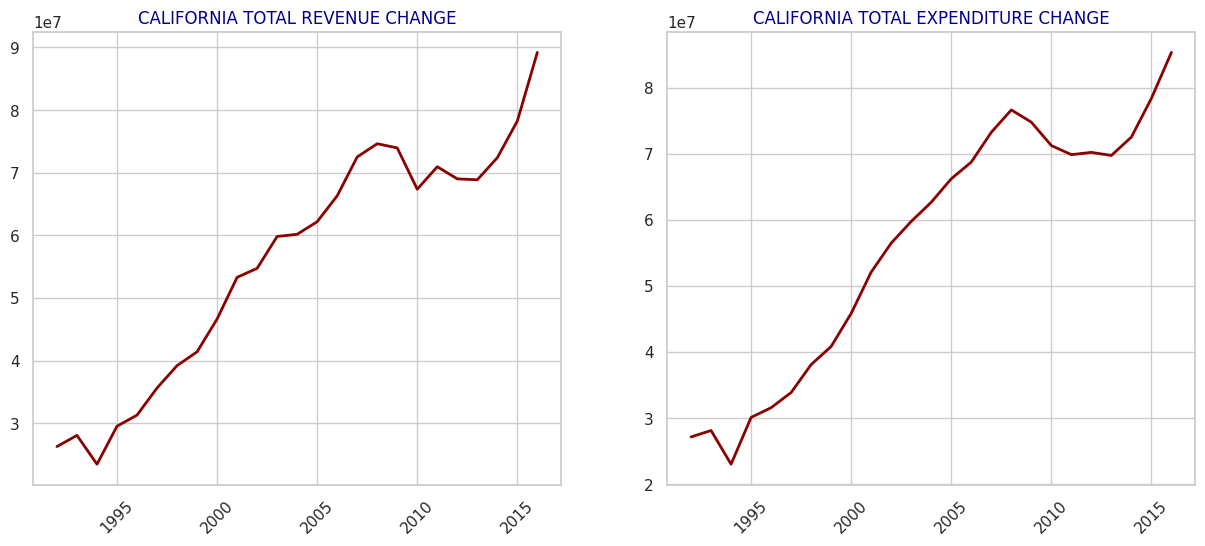

In [139]:
plt.rcParams['figure.dpi']=100
plt.rcParams['figure.figsize']=(15,6)
title_style={'family':'Century Gothic','color':'darkred','size':20}
axis_style={'family':'Century Gothic','color':'darkblue','size':25}

x=education_stats[education_stats['STATE']=='CALIFORNIA']['YEAR']
y=education_stats[education_stats['STATE']=='CALIFORNIA']['TOTAL_REVENUE']
z=education_stats[education_stats['STATE']=='CALIFORNIA']['TOTAL_EXPENDITURE']

plt.subplot(1,2,1)
plt.title('CALIFORNIA TOTAL REVENUE CHANGE',color='darkblue')
plt.plot(x,y,c="darkred",lw=2)
plt.xticks(rotation=45,fontsize=11)

plt.subplot(1,2,2)
plt.title('CALIFORNIA TOTAL EXPENDITURE CHANGE',color='darkblue')
plt.plot(x,z,c='darkred',lw=2)
plt.xticks(rotation=45,fontsize=11)

plt.show()


 - When we look at the graphs above, we see that these two data show very similar changes. When we evaluate it by years, we see a continuous increase. There seems to be a bottom in the data before 1995, and both data peaked in 2016.

**(3)** In which course are students more successful in your chosen state? Mathematics or reading?

In [140]:
my_average_math_score=education_stats[education_stats['STATE']=='CALIFORNIA']['AVG_MATH_4_SCORE'].mean()+education_stats[education_stats['STATE']=='CALIFORNIA']['AVG_MATH_8_SCORE'].mean()
my_average_reading_score=education_stats[education_stats['STATE']=='CALIFORNIA']['AVG_READING_4_SCORE'].mean()+education_stats[education_stats['STATE']=='CALIFORNIA']['AVG_READING_8_SCORE'].mean()
print("Average math score = "+str(my_average_math_score))
print("Average reading score = "+str(my_average_reading_score))

Average math score = 495.66666666666663
Average reading score = 460.57575757575756


 - In the calculation I made without correcting the data above, we see that students in California are more successful in mathematics. But I think that in order to get a healthier result, it is necessary to complete the missing data, and I think I can do this in the two following questions.

**(4)** What is the distribution of mathematics and reading grades?

 - When we look at the distribution of mathematics and reading grades data, we see that students are generally successful in mathematics. but since there is too much missing information in these columns in the dataset, I think it is necessary to work with a better dataset for a correct result, or the dataset needs to be completed properly.

**(5)** You may have noticed that there are many missing values in the mathematics and reading notes. Complete the missing values with mean, median, and interpolation. Compare the impact of these techniques on the distribution of grades.

In [141]:
#here I created 3 copies of the parts we want in the dataset. Thus, when I complete the deficiencies, it will be easier for me to compare.math_data_mean=education_stats[['STATE','YEAR','AVG_MATH_4_SCORE','AVG_MATH_8_SCORE']]
math_data_median=education_stats[['STATE','YEAR','AVG_MATH_4_SCORE','AVG_MATH_8_SCORE']]
math_data_interpolation=education_stats[['STATE','YEAR','AVG_MATH_4_SCORE','AVG_MATH_8_SCORE']]

reading_data_mean=education_stats[['STATE','YEAR','AVG_READING_4_SCORE','AVG_READING_8_SCORE']]
reading_data_median=education_stats[['STATE','YEAR','AVG_READING_4_SCORE','AVG_READING_8_SCORE']]
reading_data_interpolation=education_stats[['STATE','YEAR','AVG_READING_4_SCORE','AVG_READING_8_SCORE']]

math_data_mean['AVG_MATH_4_SCORE'].fillna(math_data_mean['AVG_MATH_4_SCORE'].mean(),inplace=True)
math_data_mean['AVG_MATH_8_SCORE'].fillna(math_data_mean['AVG_MATH_8_SCORE'].mean(),inplace=True)
math_data_median['AVG_MATH_4_SCORE'].fillna(math_data_median['AVG_MATH_4_SCORE'].median(),inplace=True)
math_data_median['AVG_MATH_8_SCORE'].fillna(math_data_median['AVG_MATH_8_SCORE'].median(),inplace=True)
math_data_interpolation.AVG_MATH_4_SCORE.interpolate(method='linear',inplace=True)
math_data_interpolation.AVG_MATH_8_SCORE.interpolate(method='linear',inplace=True)

reading_data_mean['AVG_READING_4_SCORE'].fillna(reading_data_mean['AVG_READING_4_SCORE'].mean(),inplace=True)
reading_data_mean['AVG_READING_8_SCORE'].fillna(reading_data_mean['AVG_READING_8_SCORE'].mean(),inplace=True)
reading_data_median['AVG_READING_4_SCORE'].fillna(reading_data_median['AVG_READING_4_SCORE'].median(),inplace=True)
reading_data_median['AVG_READING_8_SCORE'].fillna(reading_data_median['AVG_READING_8_SCORE'].median(),inplace=True)
reading_data_interpolation.AVG_READING_4_SCORE.interpolate(inplace=True)
reading_data_interpolation.AVG_READING_8_SCORE.interpolate(inplace=True)


In [142]:
#What I want to compare here is actually the change over the years, so I wanted to take the average of each data over the years and compare them.
math_mean_4=[]
math_mean_8=[]
math_median_4=[]
math_median_8=[]
math_inter_4=[]
math_inter_8=[]

reading_mean_4=[]
reading_mean_8=[]
reading_median_4=[]
reading_median_8=[]
reading_inter_4=[]
reading_inter_8=[]

for year in education_stats.YEAR.unique():
  math_mean_4.append(math_data_mean[math_data_mean['YEAR']==year]['AVG_MATH_4_SCORE'].mean())
  math_mean_8.append(math_data_mean[math_data_mean['YEAR']==year]['AVG_MATH_8_SCORE'].mean())
  math_median_4.append(math_data_mean[math_data_median['YEAR']==year]['AVG_MATH_4_SCORE'].mean())
  math_median_8.append(math_data_mean[math_data_median['YEAR']==year]['AVG_MATH_8_SCORE'].mean())
  math_inter_4.append(math_data_mean[math_data_interpolation['YEAR']==year]['AVG_MATH_4_SCORE'].mean())
  math_inter_8.append(math_data_mean[math_data_interpolation['YEAR']==year]['AVG_MATH_8_SCORE'].mean())

  reading_mean_4.append(reading_data_mean[reading_data_mean['YEAR']==year]['AVG_READING_4_SCORE'].mean())
  reading_mean_8.append(reading_data_mean[reading_data_mean['YEAR']==year]['AVG_READING_8_SCORE'].mean())
  reading_median_4.append(reading_data_mean[reading_data_median['YEAR']==year]['AVG_READING_4_SCORE'].mean())
  reading_median_8.append(reading_data_mean[reading_data_median['YEAR']==year]['AVG_READING_8_SCORE'].mean())
  reading_inter_4.append(reading_data_mean[reading_data_interpolation['YEAR']==year]['AVG_READING_4_SCORE'].mean())
  reading_inter_8.append(reading_data_mean[reading_data_interpolation['YEAR']==year]['AVG_READING_8_SCORE'].mean())




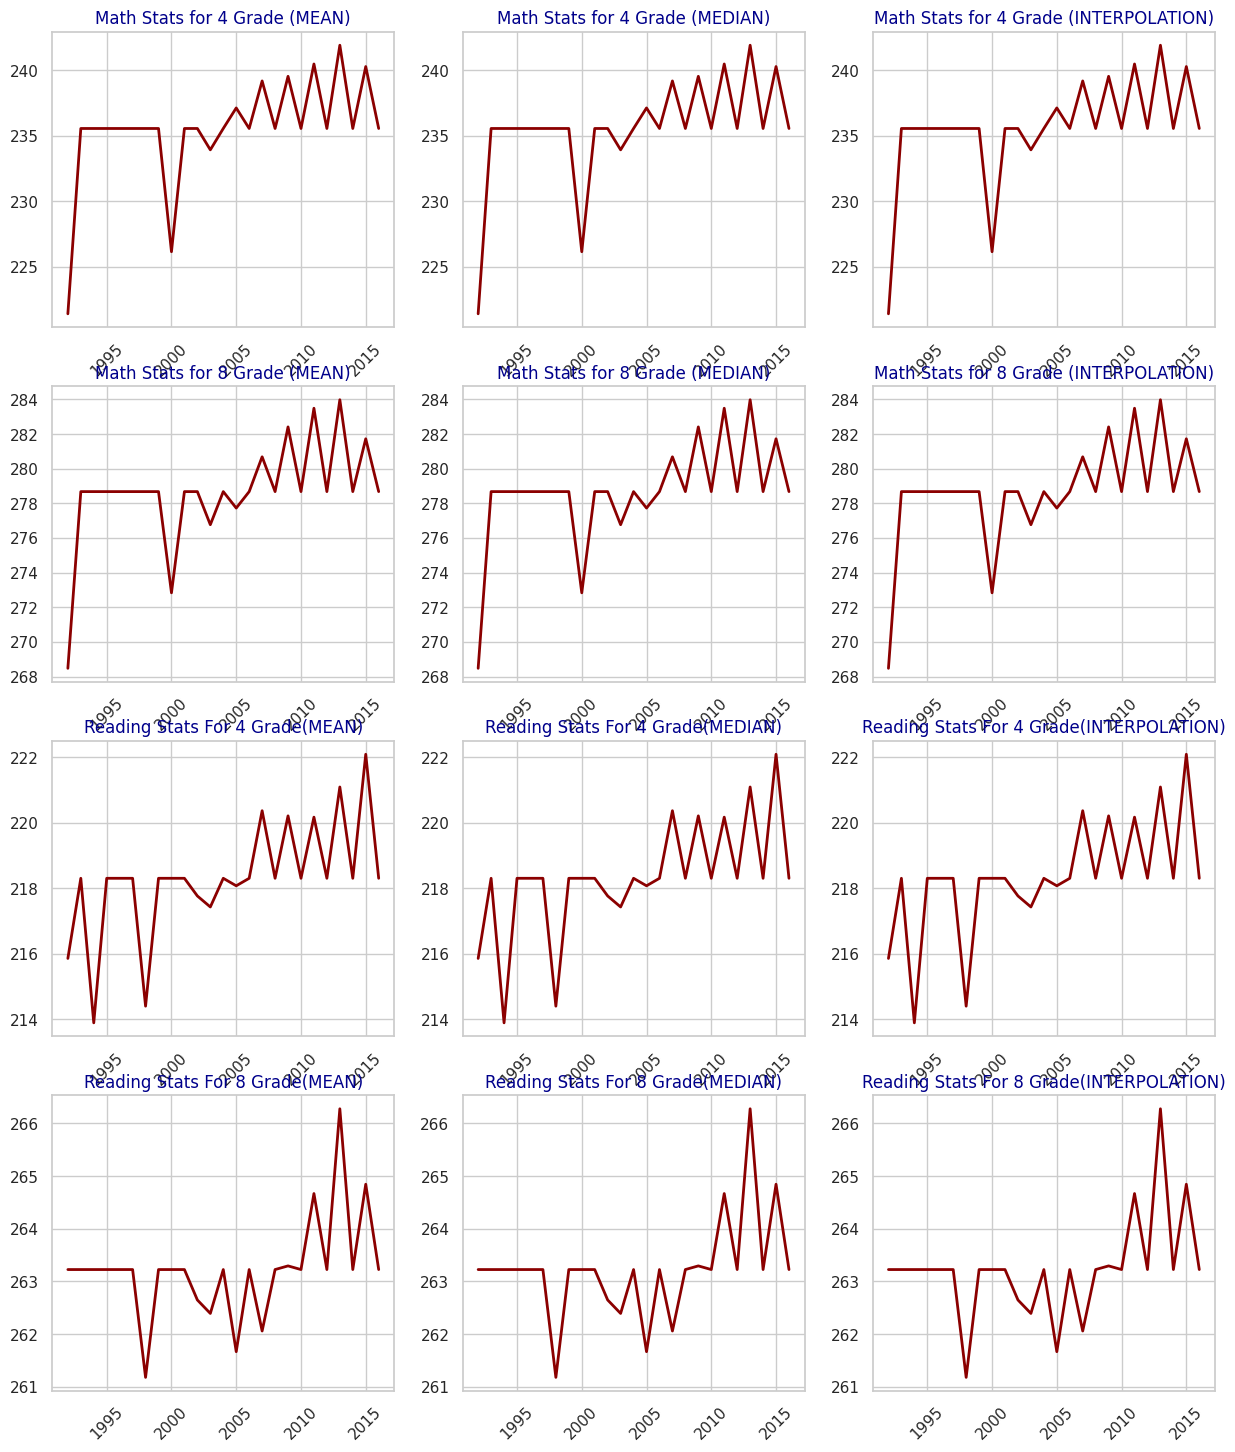

In [143]:
plt.rcParams['figure.dpi']=100
plt.rcParams['figure.figsize']=(15,18)
title_style={'family':'Century Gothic','color':'darkred','size':20}
axis_style={'family':'Century Gothic','color':'darkblue','size':25}

plt.subplot(4,3,1)
plt.title('Math Stats for 4 Grade (MEAN)',color='darkblue')
plt.plot(education_stats.YEAR.unique(),math_mean_4,c="darkred",lw=2)
plt.xticks(rotation=45,fontsize=11)

plt.subplot(4,3,2)
plt.title('Math Stats for 4 Grade (MEDIAN)',color='darkblue')
plt.plot(education_stats.YEAR.unique(),math_median_4,c="darkred",lw=2)
plt.xticks(rotation=45,fontsize=11)

plt.subplot(4,3,3)
plt.title('Math Stats for 4 Grade (INTERPOLATION)',color='darkblue')
plt.plot(education_stats.YEAR.unique(),math_inter_4,c="darkred",lw=2)
plt.xticks(rotation=45,fontsize=11)

plt.subplot(4,3,4)
plt.title('Math Stats for 8 Grade (MEAN)',color='darkblue')
plt.plot(education_stats.YEAR.unique(),math_mean_8,c="darkred",lw=2)
plt.xticks(rotation=45,fontsize=11)

plt.subplot(4,3,5)
plt.title('Math Stats for 8 Grade (MEDIAN)',color='darkblue')
plt.plot(education_stats.YEAR.unique(),math_median_8,c="darkred",lw=2)
plt.xticks(rotation=45,fontsize=11)

plt.subplot(4,3,6)
plt.title('Math Stats for 8 Grade (INTERPOLATION)',color='darkblue')
plt.plot(education_stats.YEAR.unique(),math_inter_8,c="darkred",lw=2)
plt.xticks(rotation=45,fontsize=11)

plt.subplot(4,3,7)
plt.title('Reading Stats For 4 Grade(MEAN)',color='darkblue')
plt.plot(education_stats.YEAR.unique(),reading_mean_4,c="darkred",lw=2)
plt.xticks(rotation=45,fontsize=11)

plt.subplot(4,3,8)
plt.title('Reading Stats For 4 Grade(MEDIAN)',color='darkblue')
plt.plot(education_stats.YEAR.unique(),reading_median_4,c="darkred",lw=2)
plt.xticks(rotation=45,fontsize=11)

plt.subplot(4,3,9)
plt.title('Reading Stats For 4 Grade(INTERPOLATION)',color='darkblue')
plt.plot(education_stats.YEAR.unique(),reading_inter_4,c="darkred",lw=2)
plt.xticks(rotation=45,fontsize=11)

plt.subplot(4,3,10)
plt.title('Reading Stats For 8 Grade(MEAN)',color='darkblue')
plt.plot(education_stats.YEAR.unique(),reading_mean_8,c="darkred",lw=2)
plt.xticks(rotation=45,fontsize=11)

plt.subplot(4,3,11)
plt.title('Reading Stats For 8 Grade(MEDIAN)',color='darkblue')
plt.plot(education_stats.YEAR.unique(),reading_median_8,c="darkred",lw=2)
plt.xticks(rotation=45,fontsize=11)

plt.subplot(4,3,12)
plt.title('Reading Stats For 8 Grade(INTERPOLATION)',color='darkblue')
plt.plot(education_stats.YEAR.unique(),reading_inter_8,c="darkred",lw=2)
plt.xticks(rotation=45,fontsize=11)


plt.show()


- If we interpret the graphs above, it is seen that there is not much difference between using these 3 methods while completing the data for this dataset.